In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

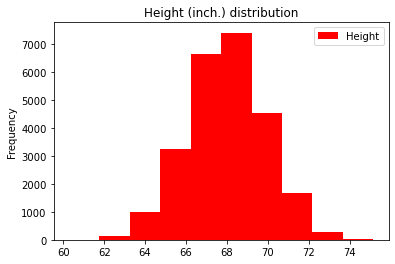

In [2]:
data = pd.read_csv('data.csv',index_col = 'Index')
data.plot(y='Height',kind='hist',color='red',title='Height (inch.) distribution')

In [3]:
data.head(5) # 1st task

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:title={'center':'Weight(pound) distribution'}, ylabel='Frequency'>

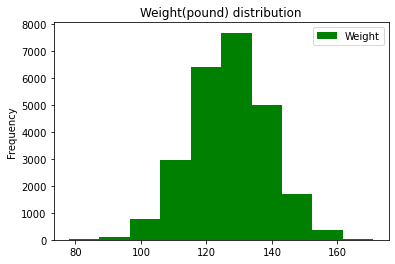

In [4]:
data.plot(y='Weight',kind='hist',color='green', title='Weight(pound) distribution' )# 2nd task


In [5]:
def make_bmi(height_inch,weight_pound):
     METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
     return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [6]:
data['BMI'] = data.apply(lambda row:make_bmi(row['Height'],row['Weight']),axis =1)

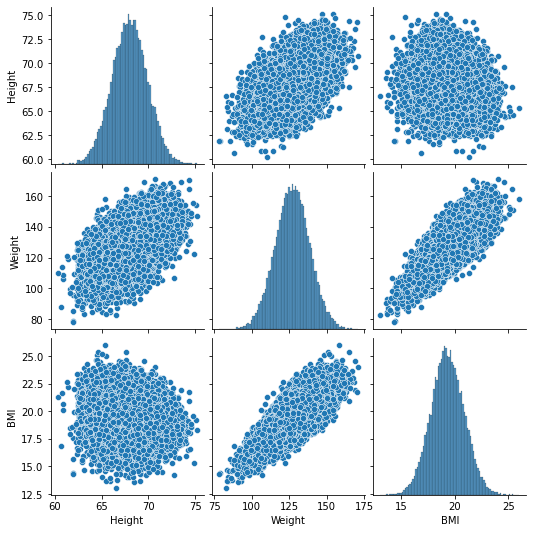

In [7]:
sns.pairplot(data) # 3rd task


<AxesSubplot:xlabel='weight_cat', ylabel='Height'>

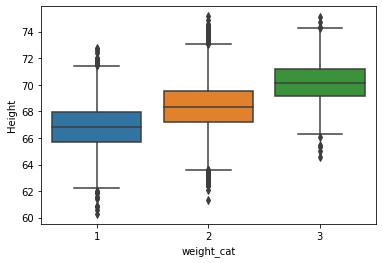

In [8]:
def weight_category(weight): #4th task
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else: return 2
data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(data=data, x='weight_cat' , y= 'Height')


<AxesSubplot:title={'center':'Height (Weight) depending'}, xlabel='Weight', ylabel='Height'>

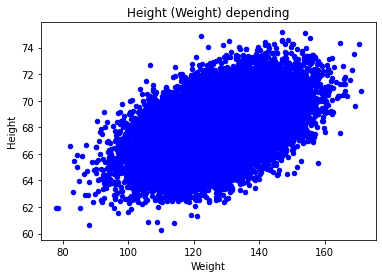

In [9]:
data.plot(y='Height',x='Weight', kind='scatter',
           color='blue',  title='Height (Weight) depending') # 5th task

# Part 2


In [31]:
def err(w0,w1): # task 6
    error =0.0
    for i in range(len(data)):
        error+=((data.iloc[i]['Height']) - (w0+w1*data.iloc[i]['Weight']))**2
    return error


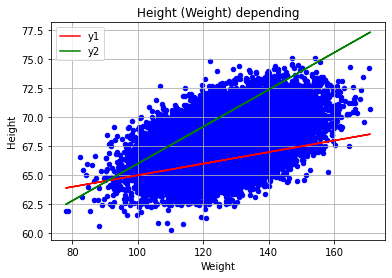

In [32]:
x = np.array(data['Weight']) # task 7
w0,w1=60,0.05
y1 = [w0+w1*f for f in x]
w0,w1=50,0.16
y2 = [w0+w1*f for f in x]

data.plot(y='Height',x='Weight', kind='scatter',
           color='blue',  title='Height (Weight) depending')
plt.plot(x,y1,label = 'y1',color = 'red')
plt.plot(x,y2,label = 'y2',color = 'green')
plt.grid('True')
plt.legend()

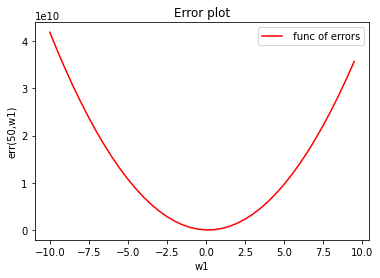

In [33]:
w0 = 50.
w = np.arange(-10,10,0.5) #task 8

er = [err(w0,t) for t in w]
plt.title('Error plot')
plt.xlabel('w1')
plt.ylabel('err(50,w1)')
plt.plot( w,er, color = 'red', label = ' func of errors' )
plt.legend()
plt.show()




In [56]:
from scipy.optimize import minimize_scalar#task 9

def err50(w1):
    return err(50,w1)

w1_opt = minimize_scalar(err50,[-5,5]).x
w1_opt

0.14109203728833175

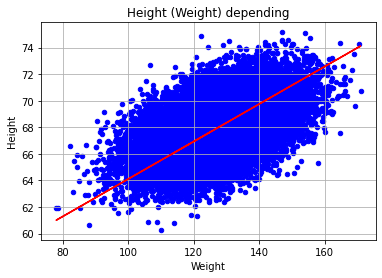

In [55]:
data.plot(y='Height',x='Weight', kind='scatter',
           color='blue',  title='Height (Weight) depending')
x=np.array(data['Weight'])
y= [w0+w1_opt*x for x in x]
plt.grid(True)
plt.plot(x,y,color = 'red')

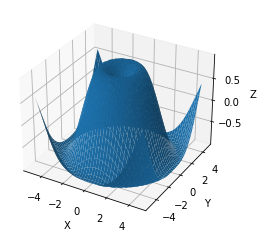

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid, при котором по векторам координат
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


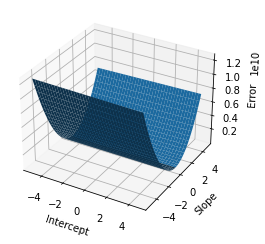

In [66]:
figErr = plt.figure()
ax = figErr.gca(projection = '3d')
w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
Z = err(w0,w1)
surff = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [86]:
import scipy.optimize as opt
def errNew(w): # task 6
    error =0.0
    for i in range(len(data)):
        error+=((data.iloc[i]['Height']) - (w[0]+w[1]*data.iloc[i]['Weight']))**2
    return error


def error1(w):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
        s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

min = opt.minimize(errNew, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))
min.x ,min.fun

(array([57.57172553,  0.08200689]), 67545.28708533282)

In [1]:
x = np.array(data['Weight'])
w0, w1 = min.x
y = [w0 + w1 * x for x in x ]

data.plot(y='Height',x='Weight', kind='scatter',
           color='blue',  title='Height (Weight) depending')
plt. plot(x,y,color = 'red',label = ' optimum line')
plt.grid(True)

NameError: name 'np' is not defined

fizzbuzz
1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz
fizz
22
23
fizz
buzz
26
fizz
28
29
fizzbuzz
31
32
fizz
34
buzz
fizz
37
38
fizz
buzz
41
fizz
43
44
fizzbuzz
46
47
fizz
49
buzz
fizz
52
53
fizz
buzz
56
fizz
58
59
fizzbuzz
61
62
fizz
64
buzz
fizz
67
68
fizz
buzz
71
fizz
73
74
fizzbuzz
76
77
fizz
79
buzz
fizz
82
83
fizz
buzz
86
fizz
88
89
fizzbuzz
91
92
fizz
94
buzz
fizz
97
98
fizz
buzz
101
fizz
103
104
fizzbuzz
106
107
fizz
109
buzz
fizz
112
113
fizz
buzz
116
fizz
118
119
fizzbuzz
121
122
fizz
124
buzz
fizz
127
128
fizz
buzz
131
fizz
133
134
fizzbuzz
136
137
fizz
139
buzz
fizz
142
143
fizz
buzz
146
fizz
148
149
fizzbuzz
151
152
fizz
154
buzz
fizz
157
158
fizz
buzz
161
fizz
163
164
fizzbuzz
166
167
fizz
169
buzz
fizz
172
173
fizz
buzz
176
fizz
178
179
fizzbuzz
181
182
fizz
184
buzz
fizz
187
188
fizz
buzz
191
fizz
193
194
fizzbuzz
196
197
fizz
199
buzz
fizz
202
203
fizz
buzz
206
fizz
208
209
fizzbuzz
211
212
fizz
214
buzz
fizz
217
218
fizz
buzz
221
fizz
2